<a href="https://colab.research.google.com/github/hadamard-2/GeezDigitsOCR/blob/main/CNN_for_Afro_MNIST_OCR_(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries & Loading the Dataset

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

path = "/content/drive/MyDrive/Ethiopic-MNIST/Ethiopic_MNIST_"
# training set
X_train = np.load(path + "X_train.npy")
y_train = np.load(path + "y_train.npy")

X_temp = np.load(path + "X_test.npy")
y_temp = np.load(path + "y_test.npy")
# validation & test set
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5)

8


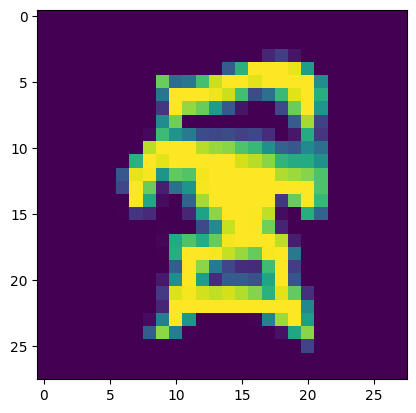

In [3]:
import random

idx = random.randint(0, len(X_train))

print(y_train[idx] + 1)
plt.imshow(X_train[idx])
plt.show()

### Normalizing the Input & Encoding the Output

In [4]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, 10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, 10)
y_val_encoded = tf.keras.utils.to_categorical(y_val, 10)

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_val = tf.keras.utils.normalize(X_val, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

10


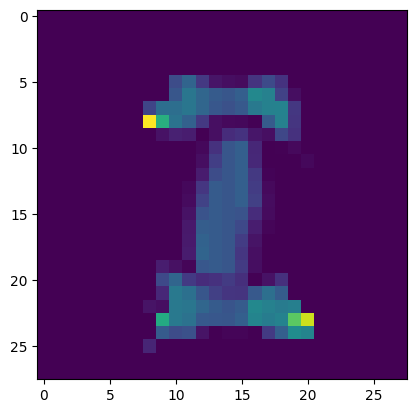

In [5]:
idx = random.randint(0, len(X_train))

print(y_train[idx] + 1)
plt.imshow(X_train[idx])
plt.show()

### Creating the Neural Network

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_val shape: (5000, 28, 28)
y_val shape: (5000,)
X_test shape: (5000, 28, 28)
y_test shape: (5000,)


### Training the Model

In [8]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train, y_train_encoded,
                    epochs=5,
                    batch_size=64,
                    validation_data=(X_val, y_val_encoded))

Epoch 1/5
938/938 [==============================] - 56s 58ms/step - loss: 0.1849 - accuracy: 0.9372 - val_loss: 0.0130 - val_accuracy: 0.9952
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0014 - val_accuracy: 0.9998
Epoch 3/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0015 - val_accuracy: 0.9996
Epoch 4/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0020 - val_accuracy: 0.9990
Epoch 5/5
938/938 [==============================] - 54s 57ms/step - loss: 5.0474e-04 - accuracy: 0.9998 - val_loss: 5.8928e-04 - val_accuracy: 0.9998


### Evaluating the Model with the Test Set

In [10]:
model.evaluate(X_test, y_test_encoded)

157/157 [==============================] - 4s 23ms/step - loss: 0.0029 - accuracy: 0.9996


[0.0029207682237029076, 0.9995999932289124]

In [11]:
model_num = 0
model.save(f"/content/drive/MyDrive/ML Models/Afro-MNIST_CNN_model{model_num}")
model_num += 1

### Testing the Model
> using examples from the test set

In [12]:
def get_predictions(y_test, y_test_pred, correct=True):
    results = []
    for i in range(y_test.shape[0]):
        pred = np.argmax(y_test_pred[i])
        actual = y_test[i]

        if (pred == actual and correct) or (pred != actual and not correct):
            results.append((i, pred, actual))

    return results


y_test_pred = model.predict(X_test)
correct_predictions = get_predictions(y_test, y_test_pred, correct=True)
incorrect_predictions = get_predictions(y_test, y_test_pred, correct=False)

157/157 [==============================] - 1s 9ms/step


Actual: 10
Predicted: 10


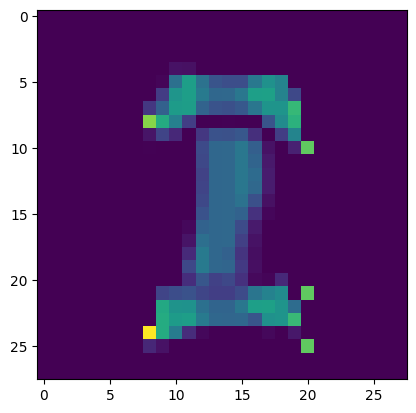

In [22]:
# Correct Prediction

idx = random.randint(0, len(correct_predictions) - 1)
actual = correct_predictions[idx][2] + 1
predicted = correct_predictions[idx][1] + 1

print(f"Actual: {actual}")
print(f"Predicted: {predicted}")
plt.imshow(X_test[correct_predictions[idx][0]])

plt.savefig(f"/content/drive/MyDrive/plots & figures/cnn_a{actual}_p{predicted}.png", dpi=300)

plt.show()

Actual: 9
Predicted: 6


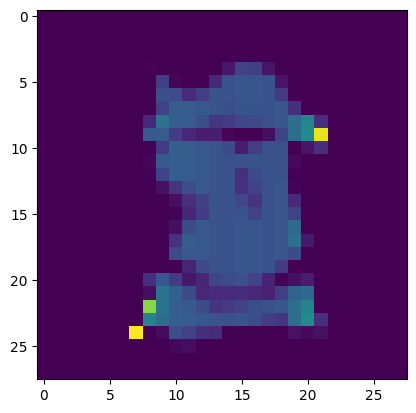

In [21]:
# Inorrect Prediction

idx = random.randint(0, len(incorrect_predictions) - 1)
actual = incorrect_predictions[idx][2] + 1
predicted = incorrect_predictions[idx][1] + 1

print(f"Actual: {actual}")
print(f"Predicted: {predicted}")
plt.imshow(X_test[incorrect_predictions[idx][0]])

plt.savefig(f"/content/drive/MyDrive/plots & figures/cnn_a{actual}_p{predicted}.png", dpi=300)

plt.show()

### Plots

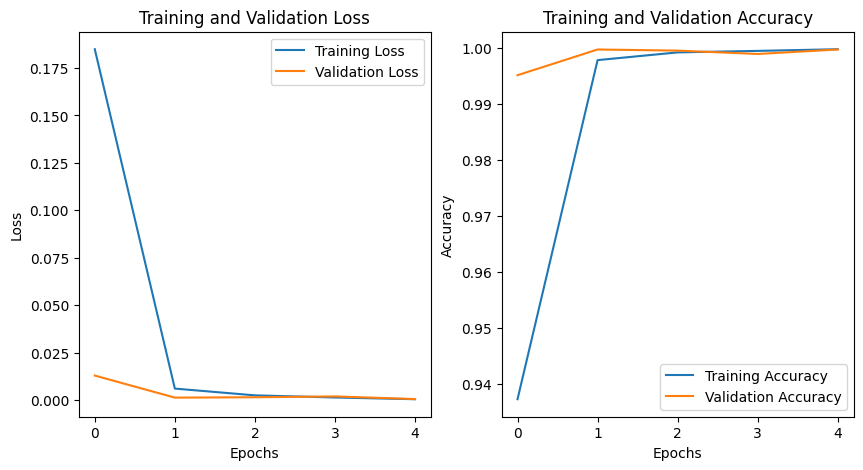

In [23]:
# Extract loss and accuracy for both training and validation sets
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig("/content/drive/MyDrive/plots & figures/training_history.png", dpi=300)

plt.show()